In [16]:
import numpy as np
import matplotlib.pyplot as plt

# グリッドワールドのサイズ
grid_size = (5, 5)  # 5x5 グリッド
gamma = 0.9  # 割引率

# 特殊状態とその動作
special_states = {"A": (0, 1), "A'": (4, 1), "B": (0, 3), "B'": (2, 3)}
special_rewards = {"A": 10, "B": 5}  # 特殊状態の報酬
special_transitions = {"A": "A'", "B": "B'"}

# 報酬と遷移確率の設定
def get_reward(state, action):
    """状態と行動に応じた報酬を返す"""
    if state == special_states["A"]:
        return special_rewards["A"]
    if state == special_states["B"]:
        return special_rewards["B"]
    next_state = move(state, action)
    if next_state == state:  # 境界にぶつかる
        return -1
    return 0

def move(state, action):
    """状態と行動に基づき次の状態を返す"""
    x, y = state
    if state in [special_states["A"], special_states["B"]]:
        return special_states[special_transitions["A" if state == special_states["A"] else "B"]]
    if action == "north" and x > 0:
        return (x - 1, y)
    if action == "south" and x < grid_size[0] - 1:
        return (x + 1, y)
    if action == "east" and y < grid_size[1] - 1:
        return (x, y + 1)
    if action == "west" and y > 0:
        return (x, y - 1)
    return state

# 等確率ランダムポリシー
actions = ["north", "south", "east", "west"]
def equiprobable_policy(state):
    return 1 / len(actions)

# 値関数の初期化
v = np.zeros(grid_size)

# 値関数の反復計算
def compute_value_function():
    global v
    delta = float("inf")
    threshold = 1e-4
    iterations = []  # 学習の推移を保存
    while delta > threshold:
        delta = 0
        new_v = np.zeros_like(v)
        for x in range(grid_size[0]):
            for y in range(grid_size[1]):
                state = (x, y)
                value = 0
                for action in actions:
                    prob = equiprobable_policy(state)
                    next_state = move(state, action)
                    reward = get_reward(state, action)
                    value += prob * (reward + gamma * v[next_state])
                new_v[state] = value
                delta = max(delta, abs(v[state] - value))
        v = new_v
        iterations.append(v.copy())  # 学習の推移を記録
    return iterations

# 値関数を計算
iterations = compute_value_function()



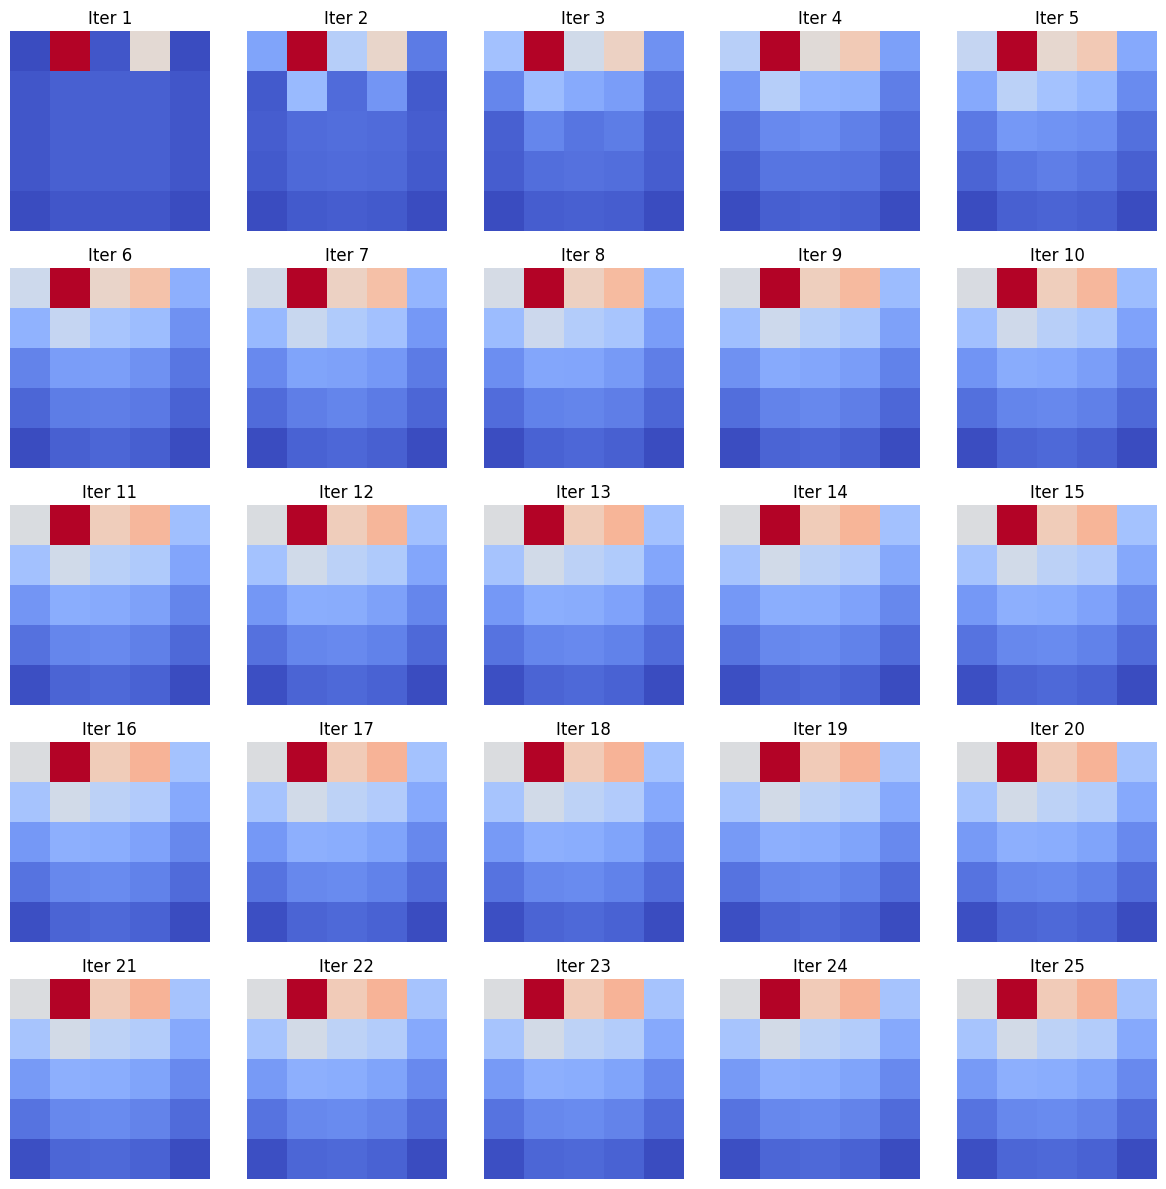

In [17]:
# 学習の推移を可視化
def plot_learning_progress(iterations):
    max_subplots = 25
    num_iterations = len(iterations)
    num_plots = min(max_subplots, num_iterations)
    rows = cols = int(np.ceil(np.sqrt(num_plots)))

    plt.figure(figsize=(12, 12))
    for i in range(num_plots):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(iterations[i], cmap="coolwarm", origin="upper")
        plt.title(f"Iter {i + 1}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_learning_progress(iterations)

<Axes: >

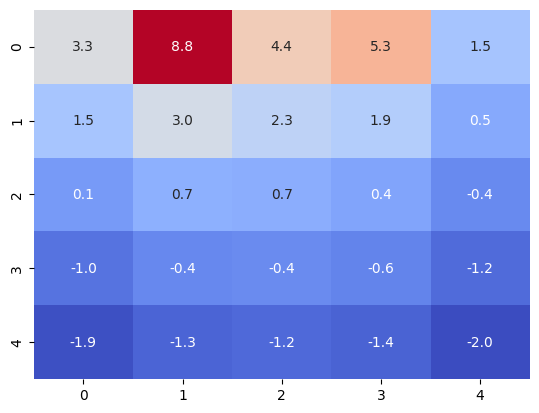

In [6]:
import seaborn as sns 
sns.heatmap(v, cmap="coolwarm", annot=True, fmt=".1f", cbar=False)

In [12]:
# 学習の推移を可視化
def plot_learning_progress(iterations):
    plt.figure(figsize=(10, 10))
    for i, v_snapshot in enumerate(iterations):
        plt.subplot(5, 5, i + 1)  # 最大25回のスナップショットを表示
        plt.imshow(v_snapshot, cmap="coolwarm", origin="upper")
        plt.title(f"Iter {i + 1}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

ValueError: num must be an integer with 1 <= num <= 25, not 26

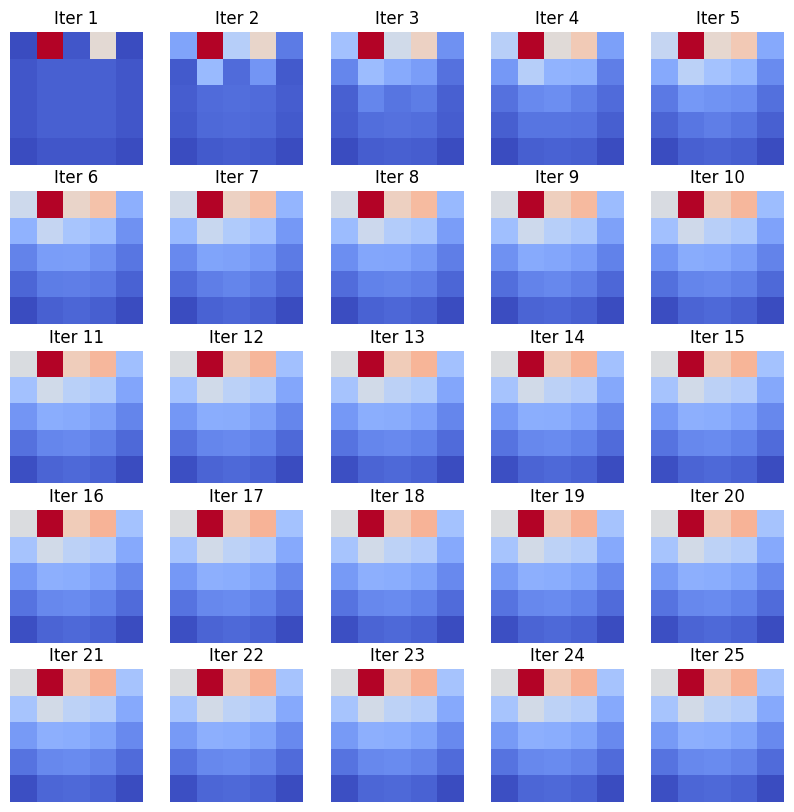

In [13]:
plot_learning_progress(iterations)